In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# read data 1 and refine dataframe
data1 = pd.read_csv("data1.csv")
data1['date'] = data1['date'].apply(lambda x: x.split(',')[1])
data1 = data1[data1.userscore != "tbd"]
data1.userscore = data1.userscore.apply(np.float64)
data1.userscore=pd.to_numeric(data1.userscore)
data1['userscore']=data1['userscore']*10
data1.userscore = data1.userscore.apply(np.int64)
data1.date = data1.date.apply(np.int64)

#read csv file that merges data 2 and 3
data2 = pd.read_csv('combo2.csv')
data2 = data2.rename(columns = {'release_Date':'date','user_Score':'userscore','title':'name','Critic_Score':'metascore'})
data2.date = data2.date.apply(np.int64)
print("data1 columns: ",data1.columns)
print("data2 columns: ",data2.columns)

data2 = data2.drop('Unnamed: 0', axis = 1)
data1

data1 columns:  Index(['metascore', 'name', 'console', 'userscore', 'date'], dtype='object')
data2 columns:  Index(['Unnamed: 0', 'name', 'console', 'date', 'tot_sale', 'metascore',
       'userscore'],
      dtype='object')


,metascore,name,console,userscore,date
0,97,Grand Theft Auto V,PS3,83,2013
1,97,Grand Theft Auto V,X360,83,2013
2,95,The Last of Us,PS3,92,2013
3,94,BioShock Infinite,PS3,85,2013
4,94,BioShock Infinite,PC,86,2013
5,93,BioShock Infinite,X360,85,2013
6,93,Super Mario 3D World,WIIU,89,2013
7,92,Fire Emblem: Awakening,3DS,91,2013
8,92,Rayman Legends,WIIU,87,2013
9,91,Fez,PC,67,2013


In [63]:
# merge data 1 2 and 3
merge_list = ['name','console','date','userscore','date','metascore']
final_comb = pd.merge(data1, data2, on= merge_list, how = 'outer' ,indicator=False)
final_comb = final_comb.dropna()
final_comb

,metascore,name,console,userscore,date,tot_sale
3,94,BioShock Infinite,PS3,85,2013,1.69
5,93,BioShock Infinite,X360,85,2013,1.93
10,91,Rayman Legends,PS3,87,2013,0.58
17,90,Rayman Legends,X360,82,2013,0.43
39,87,FIFA 14,PS4,63,2013,3.01
47,87,NBA 2K14,X360,49,2013,2.52
52,86,Saints Row IV,PC,74,2013,0.19
61,86,DmC: Devil May Cry,X360,51,2013,0.44
62,86,Assassin's Creed IV: Black Flag,X360,79,2013,3.30
64,86,Diablo III,PS3,64,2013,1.91


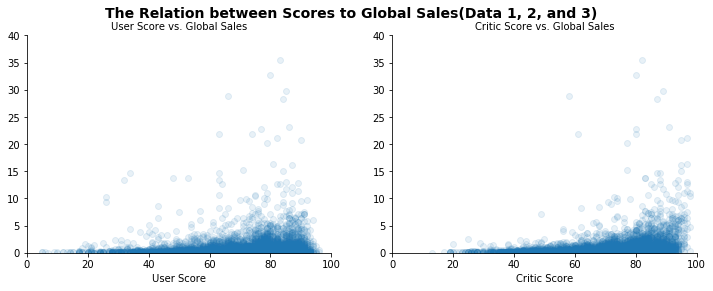

In [97]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,4))
i
#labels
fig.suptitle("The Relation between Scores to Global Sales(Data 1, 2, and 3)", fontsize = 14, fontweight = "bold") 
ax[0].set_title("User Score vs. Global Sales", fontsize = 10) 
ax[1].set_title("Critic Score vs. Global Sales", fontsize = 10)

count = 0
name_list = ['userscore','metascore']

corr_mat1 = final_comb.corr()
#cr = corr_mat.user_Score.tot_sale

for var in ax: 
    var.scatter(final_comb[name_list[count]], final_comb["tot_sale"],alpha= 0.1)
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    
    var.set_xlim(0,100)
    var.set_ylim(0,40)
    count+=1

ax[0].set_xlabel("User Score")
ax[1].set_xlabel("Critic Score")
plt.show()

In [74]:
# scatter plot by column console
#final_comb = final_comb.drop(['level_0','index'],axis = 1)
final_comb.sort_values("console", axis = 0, ascending = True, inplace = True)
console_name = []
for i in final_comb.console:
    if console_name.count(i) == 0:
        console_name.append(i)
console_div1 = ['PS','PS2','PS3','PS4','PSP','PSV']
console_div2 = ['3DS','DS']
console_div3 = ['Wii','WiiU']
console_div4 = ['X360','XB','XOne']
console_div5 = ['DC','GBA','GC','PC']

In [88]:
final_comb = final_comb.reset_index()
final_comb = final_comb.drop(['level_0','index'],axis = 1)

Index(['metascore', 'name', 'console', 'userscore', 'date', 'tot_sale'], dtype='object')

In [94]:
console_div1 = ['PS','PS2','PS3','PS4','PSP','PSV']
# PS :1941-2096
# PS2 : 2097-3257
# PS3 : 3258-4047
# PS4 : 4048-4296
# PSP : 4297-4689
# PSV : 4690-4808
# for Play Station Series Consoles (PS,PS2,PS3,PS4,PSP,PSV)

fig, ax = plt.subplots(nrows = 2, ncols = 3, sharex = True, figsize = (12,6)) 

ax = ax.ravel() 
 
count = 0
for xxx in ax:
    xxx.scatter(["gdp_growth"], usdata[new_name[count]], alpha= 0.50) 
    xxx.set_title(nice_name[count], fontsize = 10) 
    xxx.spines["right"].set_visible(False) 
    xxx.spines["top"].set_visible(False) 
    xxx.set_ylabel("Annualized Growth Rate", fontsize = 8)   
    if count > 1: 
        xxx.set_xlabel("Annualized GDP Growth Rate", fontsize = 8) 
    xxx.set_xlim(-10,10)  
    xxx.set_ylim(-10,10) 
    count+=1
fig.suptitle("GDP and SubComponents", fontsize = 12, fontweight = "bold")
plt.show()

,metascore,name,console,userscore,date,tot_sale
4690,49,Dungeon Hunter Alliance,PSV,64,2012,0.20
4691,93,Persona 4: Golden,PSV,92,2012,1.12
4692,49,Asphalt: Injection,PSV,48,2011,0.22
4693,76,Grand Kingdom,PSV,88,2015,0.06
4694,57,Army Corps of Hell,PSV,66,2011,0.09
4695,93,Odin Sphere: Leifthrasir,PSV,79,2016,0.14
4696,71,Toukiden: The Age of Demons,PSV,80,2013,0.35
4697,85,Terraria,PSV,78,2013,0.10
4698,78,Oreshika: Tainted Bloodlines,PSV,80,2014,0.15
4699,68,MLB 14: The Show,PSV,70,2014,0.11


In [ ]:
# for Play Station Series Consoles (PS,PS2,PS3,PS4,PSP,PSV)

fig, ax = plt.subplots(nrows = 2, ncols = 3, sharex = True, figsize = (12,4)) 

ax = ax.ravel() 
 
count = 0
for xxx in ax:
    xxx.scatter(["gdp_growth"], usdata[new_name[count]], alpha= 0.50) 
    xxx.set_title(nice_name[count], fontsize = 10) 
    xxx.spines["right"].set_visible(False) 
    xxx.spines["top"].set_visible(False) 
    xxx.set_ylabel("Annualized Growth Rate", fontsize = 8)   
    if count > 1: 
        xxx.set_xlabel("Annualized GDP Growth Rate", fontsize = 8) 
    xxx.set_xlim(-10,10)  
    xxx.set_ylim(-10,10) 
    cr = corr_mat.gdp_growth[new_name[count]] 
    message = "Correlation = " + str(round(cr,2)) 
    xxx.text(10, -8, message, horizontalalignment='right') 
    count+=1
fig.suptitle("GDP and SubComponents", fontsize = 12, fontweight = "bold")
plt.show()

In [30]:
# year (line) avg sale, avg user score, avg critic score, 

final_comb.sort_values("date", axis = 0, ascending = True, inplace = True)
year = []
for i in final_comb.date:
    if year.count(i) == 0:
        year.append(i)
avg1 = 0
avg2 = 0
avg3 = 0
avg_sale = []
avg_user = []
avg_critic = []
for i in year:
    avg1 = final_comb[final_comb.date == i].tot_sale.mean()
    avg2 = final_comb[final_comb.date == i].userscore.mean()
    avg3 = final_comb[final_comb.date == i].metascore.mean()
    avg_sale.append(avg1)
    avg_user.append(avg2)
    avg_critic.append(avg3)
    avg1 = 0
    avg2 = 0
    avg3 = 0
years = pd.Series(year,name='year')
avgsale = pd.Series(avg_sale, name = 'sale')
avguser = pd.Series(avg_user,name= 'user_score')
avgcritic = pd.Series(avg_critic, name = 'critic_score')
annual_mean_combo = pd.concat([years,avgsale,avguser,avgcritic],axis=1)
annual_mean_combo =annual_mean_combo.set_index('year')

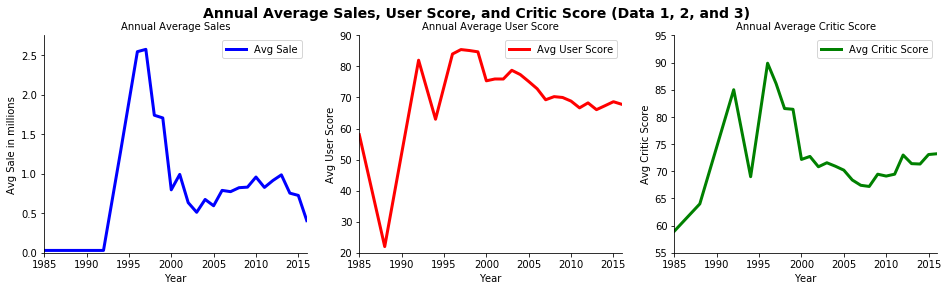

In [44]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))

#labels
fig.suptitle("Annual Average Sales, User Score, and Critic Score (Data 1, 2, and 3)", fontsize = 14, fontweight = "bold") 
ax[0].set_title("Annual Average Sales", fontsize = 10) 
ax[1].set_title("Annual Average User Score", fontsize = 10)
ax[2].set_title("Annual Average Critic Score", fontsize = 10)

count = 0
name_list = ['sale','user_score','critic_score']

corr_mat1 = annual_mean_combo.corr()
#cr = corr_mat.user_Score.tot_sale

annual_mean_combo.sale.plot(ax = ax[0], color = 'b', linewidth = 3.0)
annual_mean_combo.user_score.plot(ax = ax[1], color = 'r', linewidth = 3.0)
annual_mean_combo.critic_score.plot(ax = ax[2], color = 'g', linewidth = 3.0)
for var in ax: 
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    
    var.set_xlabel('Year')
    var.set_xlim(1985,2016)
    
    if count == 0 :
        var.set_ylabel('Avg Sale in millions')
        var.set_ylim(0,2.75)
    elif count == 1:
        var.set_ylabel('Avg User Score')
        var.set_ylim(20,90)
    else:
        var.set_ylabel('Avg Critic Score')
        var.set_ylim(55,95)
    ax[0].legend(["Avg Sale"],frameon=True)
    ax[1].legend(["Avg User Score"],frameon=True)
    ax[2].legend(["Avg Critic Score"],frameon=True)
    count+=1    
plt.show()